In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
def f(x):
    return -x

def exact_solution(t):
    return np.exp(-t)

# Euler's method for numerical integration
def euler_method(f, x0, t0, t_end, dt):
    num_steps = int((t_end - t0) / dt)
    t = np.linspace(t0, t_end, num_steps + 1)
    x = np.zeros_like(t)
    x[0] = x0
    for i in range(1, num_steps + 1):
        x[i] = x[i-1] + f(x[i-1]) * dt
    return t, x

# Euler's improved method for numerical integration
def improved_euler_step(x, dt):
    k1 = f(x)
    k2 = f(x + dt * k1)
    return x + dt * (k1 + k2) / 2

def solve_improved_euler(x0, dt, num_steps):
    x_values = [x0]
    t_values = [0]
    x = x0
    for _ in range(num_steps):
        x = improved_euler_step(x, dt)
        t_values.append(t_values[-1] + dt)
        x_values.append(x)
    return np.array(t_values), np.array(x_values)

def runge_kutta_step(x, dt):
    k1 = f(x)
    k2 = f(x + dt * k1 / 2)
    k3 = f(x + dt * k2 / 2)
    k4 = f(x + dt * k3)
    return x + dt * (k1 + 2*k2 + 2*k3 + k4) / 6

def solve_runge_kutta(x0, dt, num_steps):
    x_values = [x0]
    t_values = [0]
    x = x0
    for _ in range(num_steps):
        x = runge_kutta_step(x, dt)
        t_values.append(t_values[-1] + dt)
        x_values.append(x)
    return np.array(t_values), np.array(x_values)

In [137]:
# Define the parameters
x0 = 1  # Initial condition
t0 = 0  # Initial time
t_end = 1  # End time
dts = np.array([1, 0.1, 0.01, 0.001, 0.0001])  # Time step sizes

In [138]:
def plot_results(t, x_exact,x_approx, dt, method):
    # Create subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    # Plot data on the first subplot (axs[0])
    axs[0].plot(t, x_exact, label=f'Exact Solution (dt={dt})', linestyle='--')
    axs[0].plot(t, x_approx, label= f'{method} (dt={dt})')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('x')
    axs[0].set_title('{} with Different Time Step Sizes'.format(method))
    axs[0].legend()
    axs[0].grid(True)
    
    error = np.abs(x_exact- x_approx)
    # Plot data on the second subplot (axs[1])
    axs[1].plot(t, error, label=f'dt={dt}')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('E = |x_exact- x_approx|')
    axs[1].set_title('{} Error with Different Time Step Sizes'.format(method))
    axs[1].legend()
    axs[1].grid(True)
    
    log_error = np.log(error)
    log_error[error == 0] = np.log(1e-30)
    if dt==1:
        axs[2].scatter(np.log(t), np.log(error), label=f'dt={dt}', s=10)  
    axs[2].plot(np.log(t), np.log(error), label=f'dt={dt}')   
    axs[2].set_xlabel('ln(t)')
    axs[2].set_ylabel('ln(|x_exact- x_approx|)')
    axs[2].set_title('{} Error with Different Time Step Sizes'.format(method))
    axs[2].legend()
    axs[2].grid(True)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    plt.show()
    return 0

C:\Users\35196\AppData\Local\Temp\ipykernel_21100\2217951700.py:22: RuntimeWarning: divide by zero encountered in log
  log_error = np.log(error)
C:\Users\35196\AppData\Local\Temp\ipykernel_21100\2217951700.py:25: RuntimeWarning: divide by zero encountered in log
  axs[2].scatter(np.log(t), np.log(error), label=f'dt={dt}', s=10)
C:\Users\35196\AppData\Local\Temp\ipykernel_21100\2217951700.py:26: RuntimeWarning: divide by zero encountered in log
  axs[2].plot(np.log(t), np.log(error), label=f'dt={dt}')


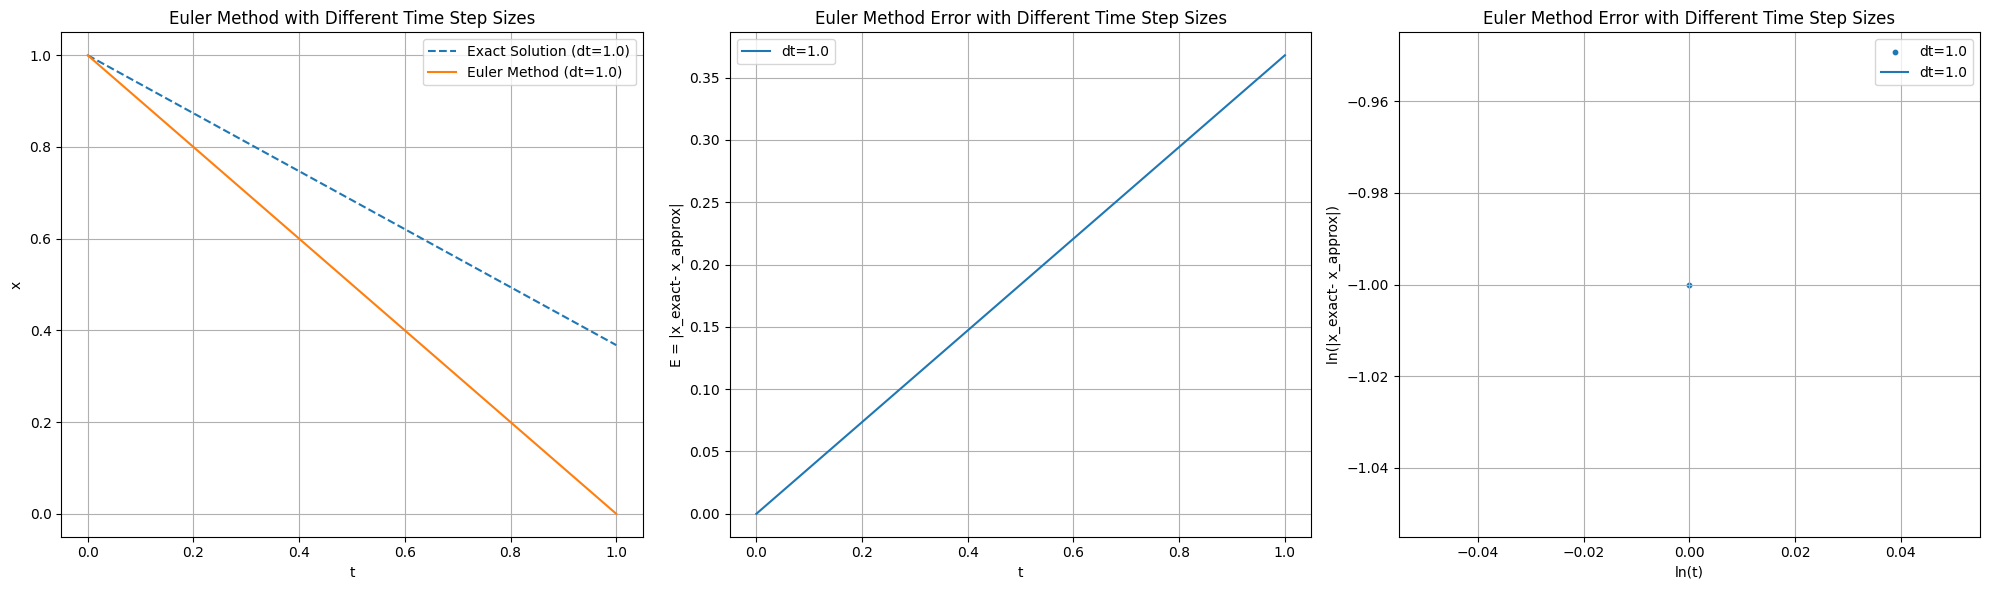

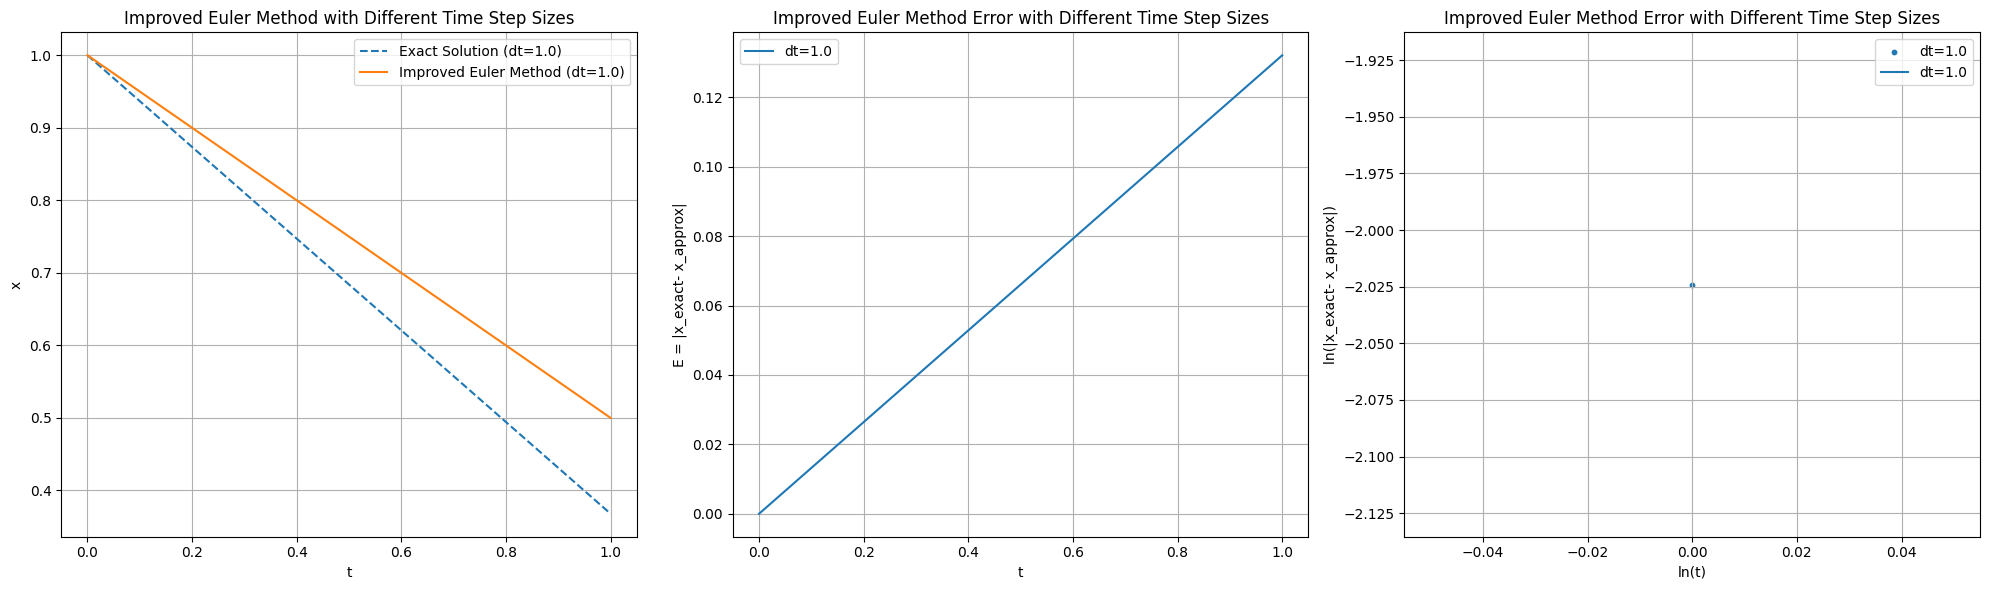

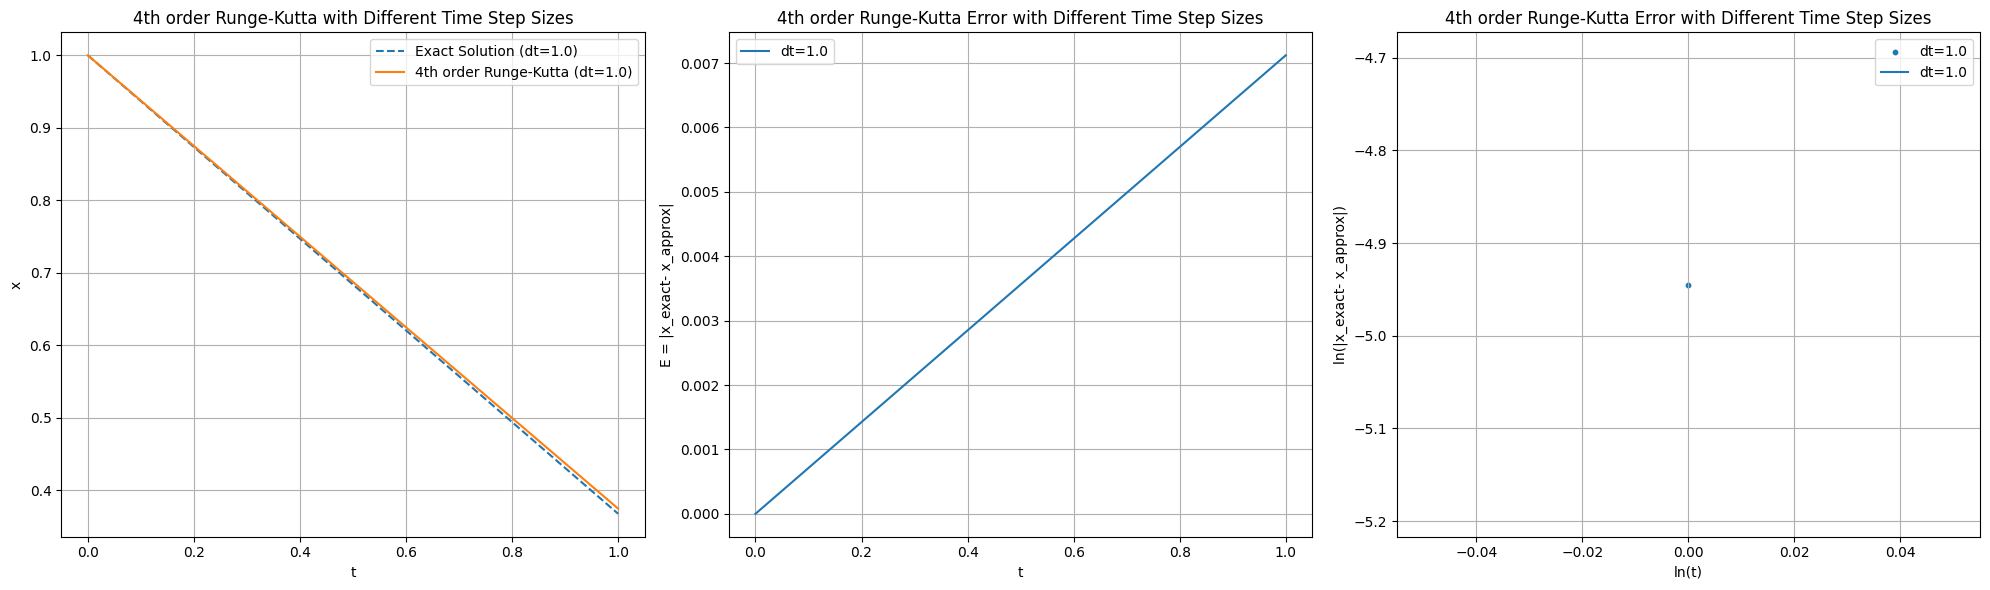

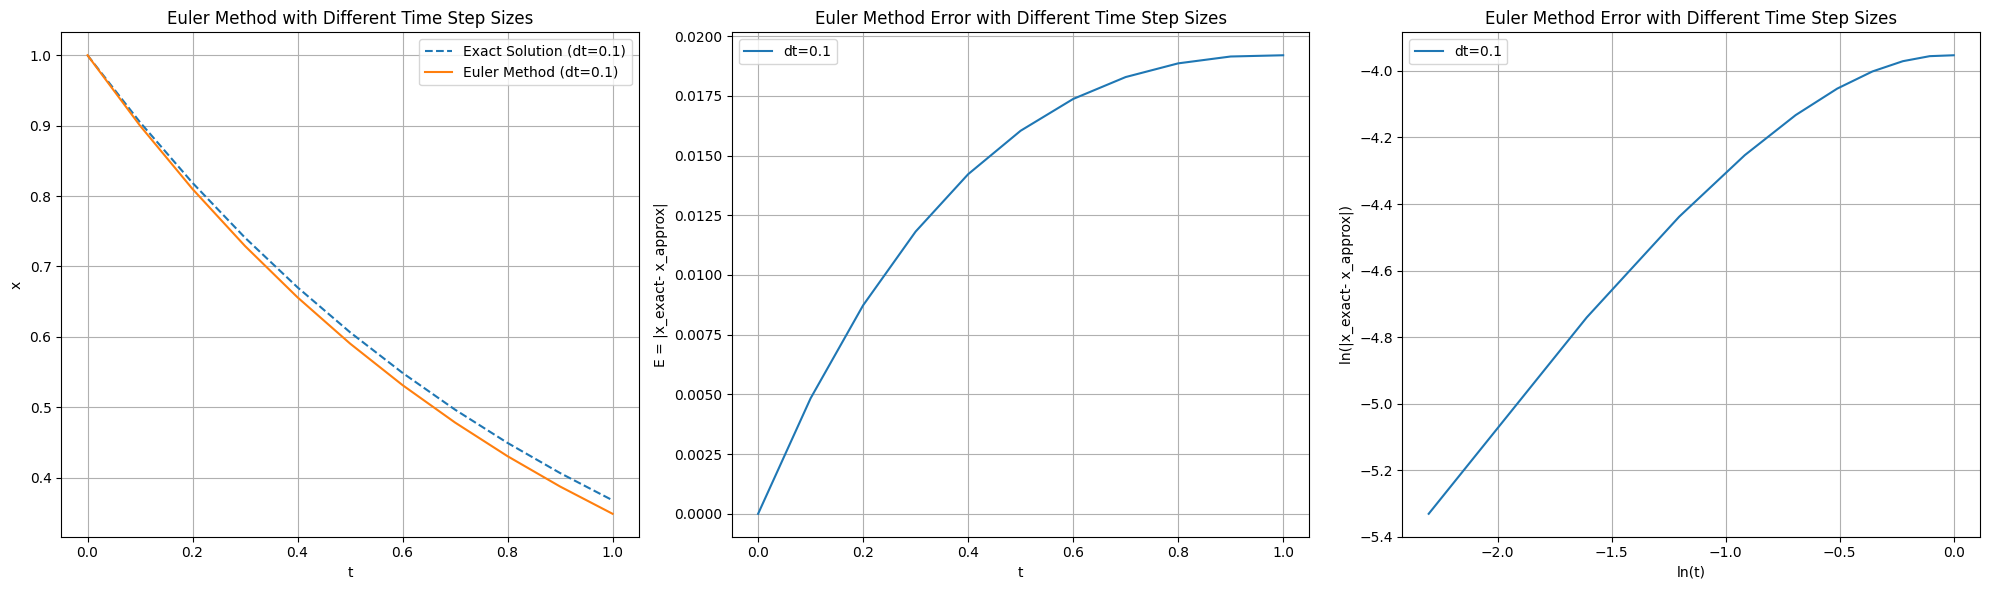

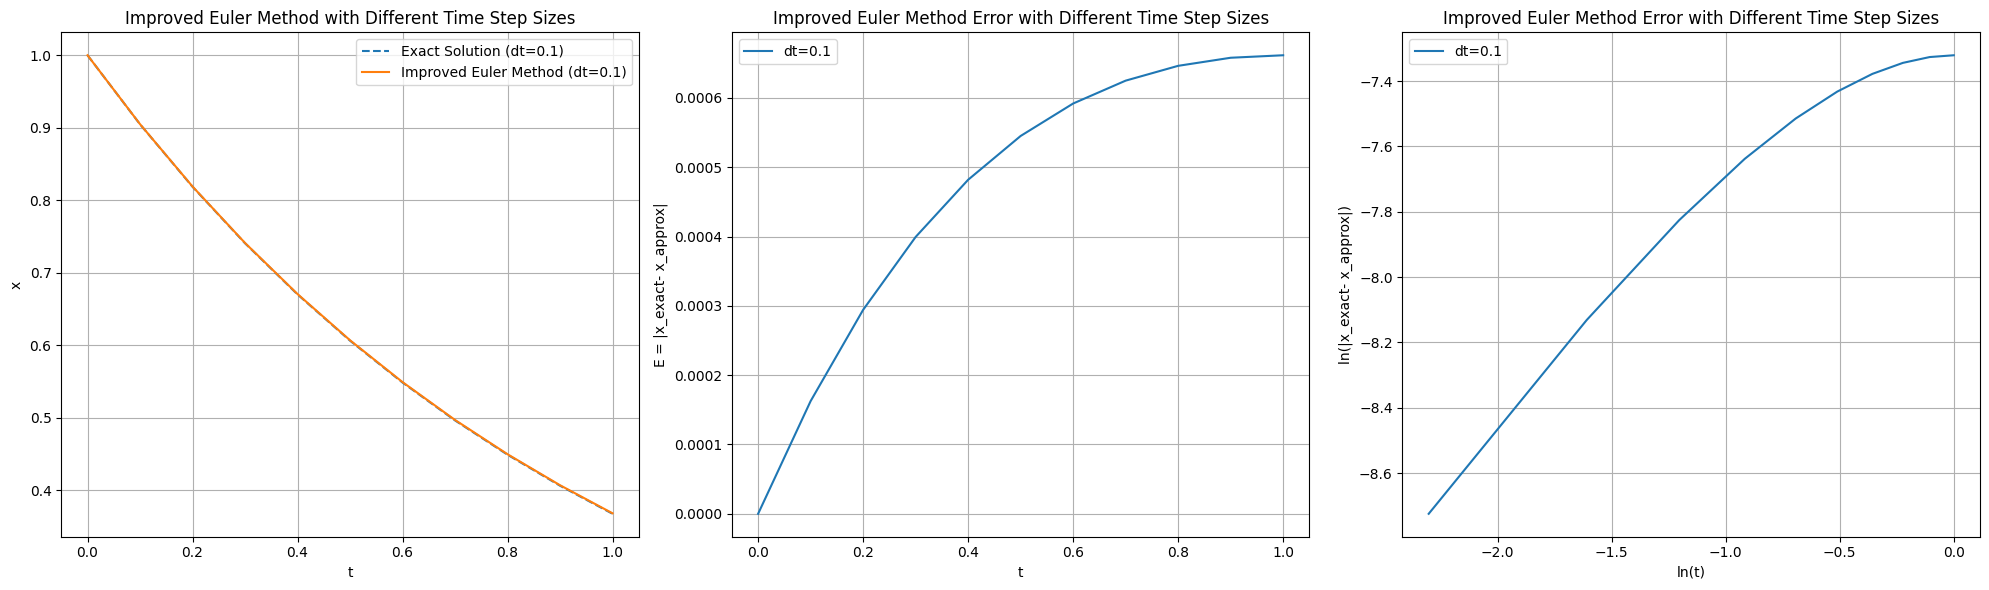

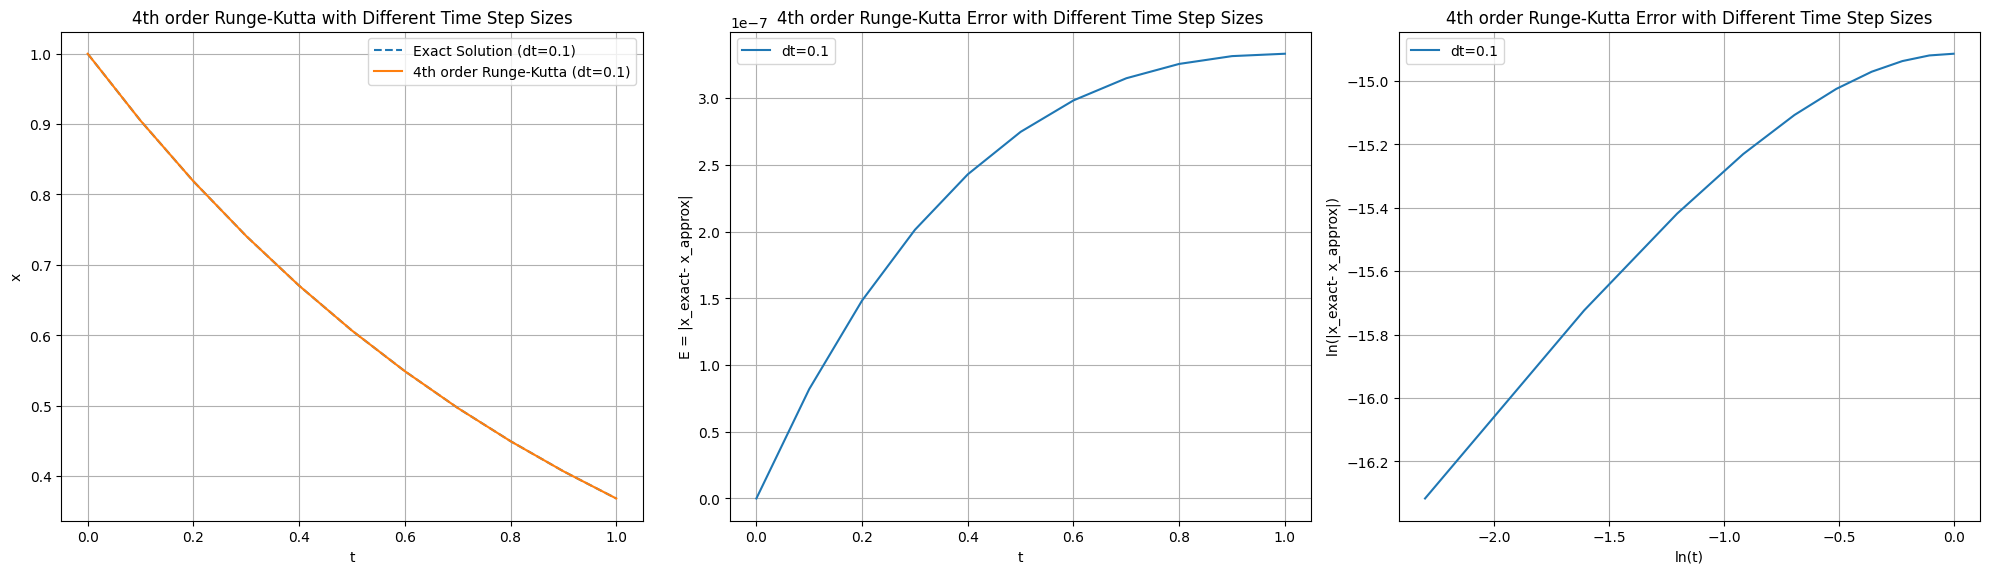

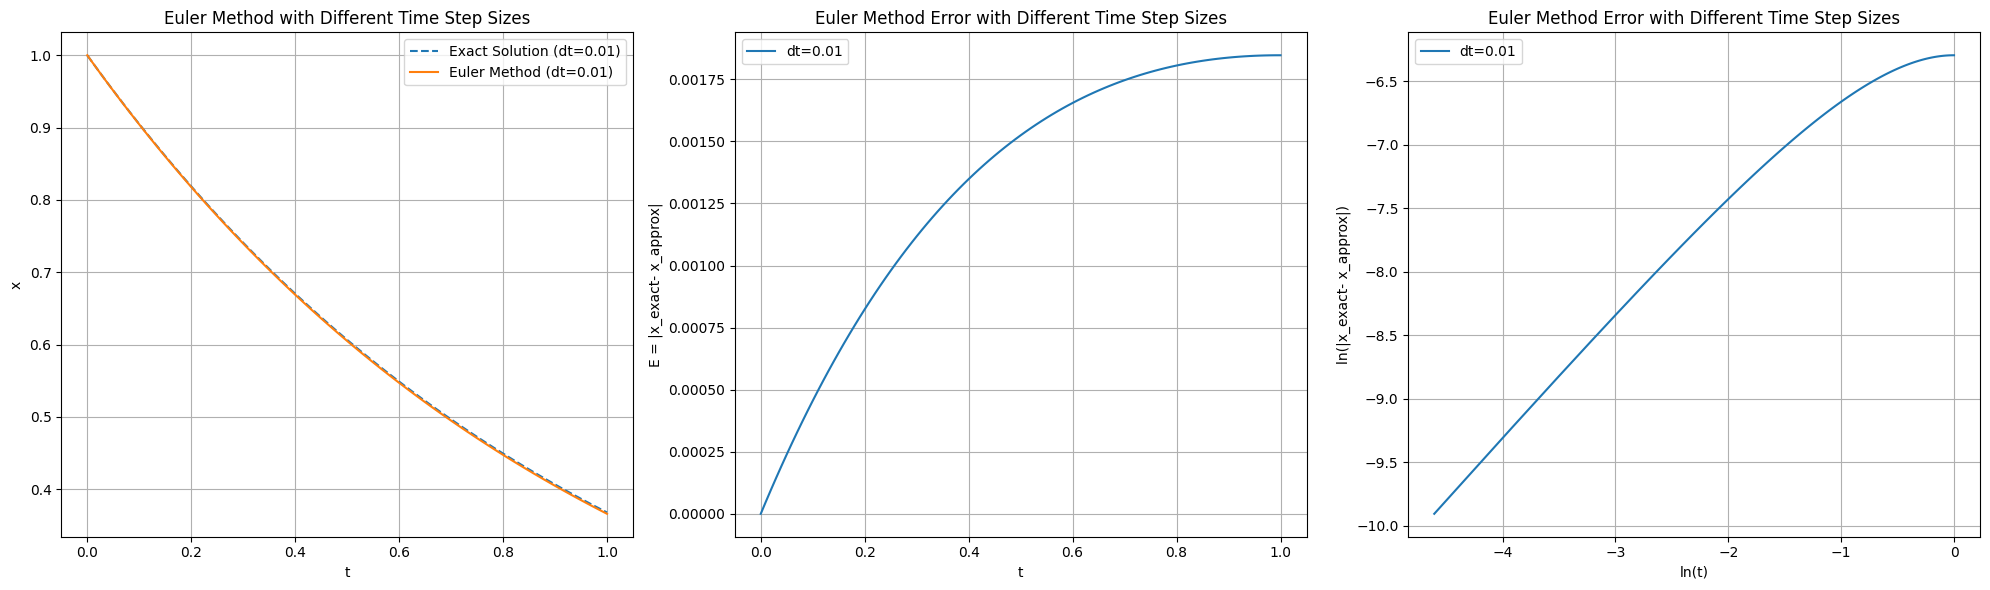

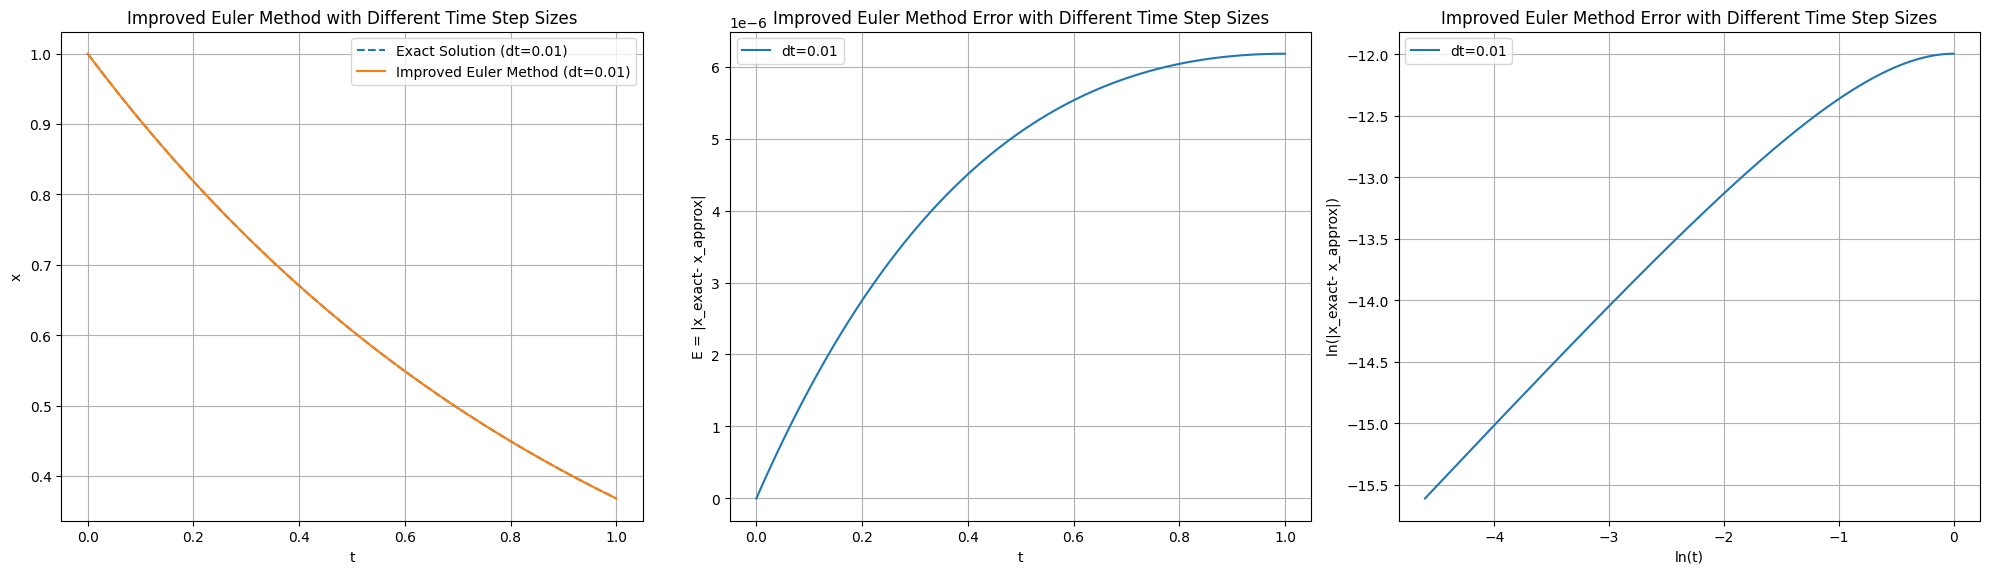

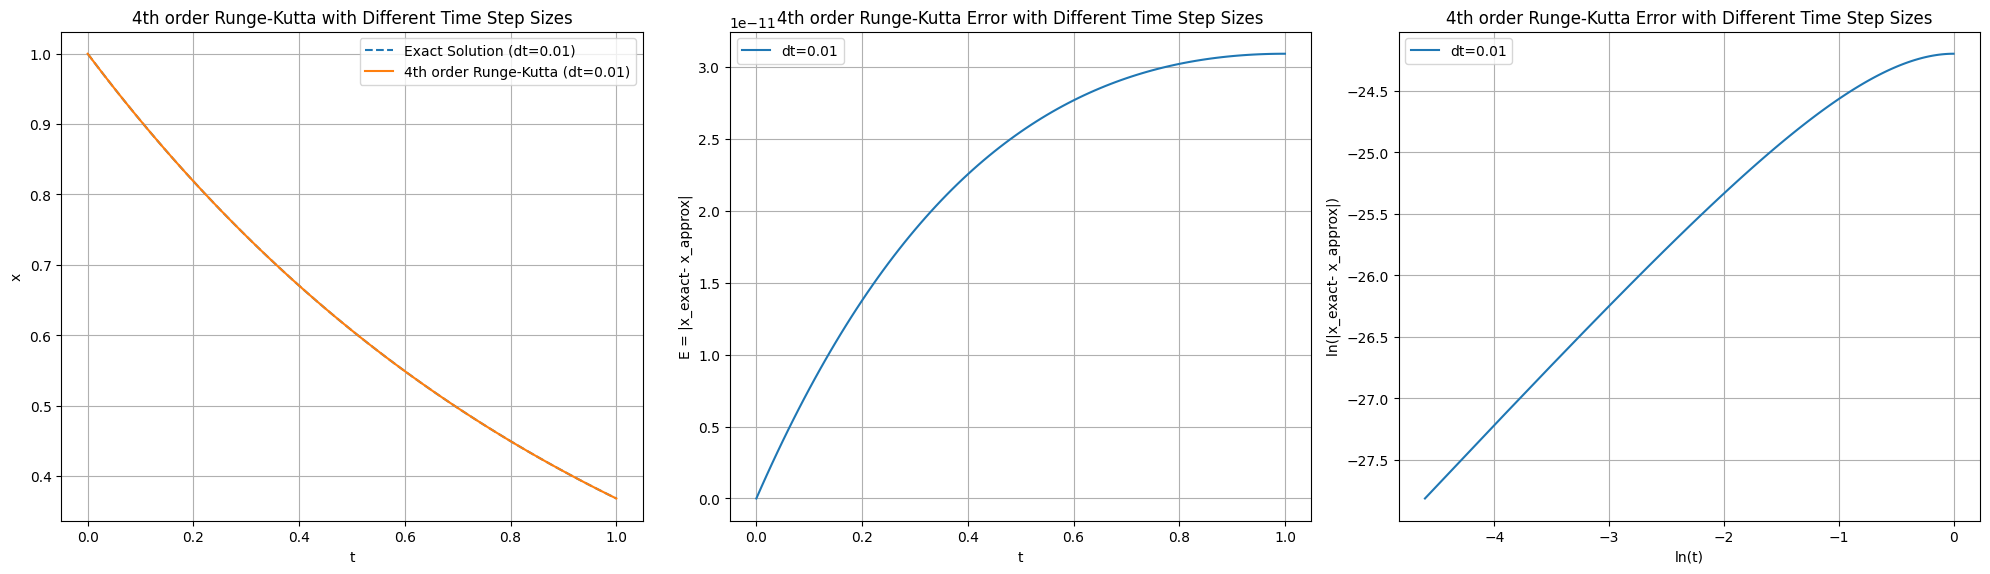

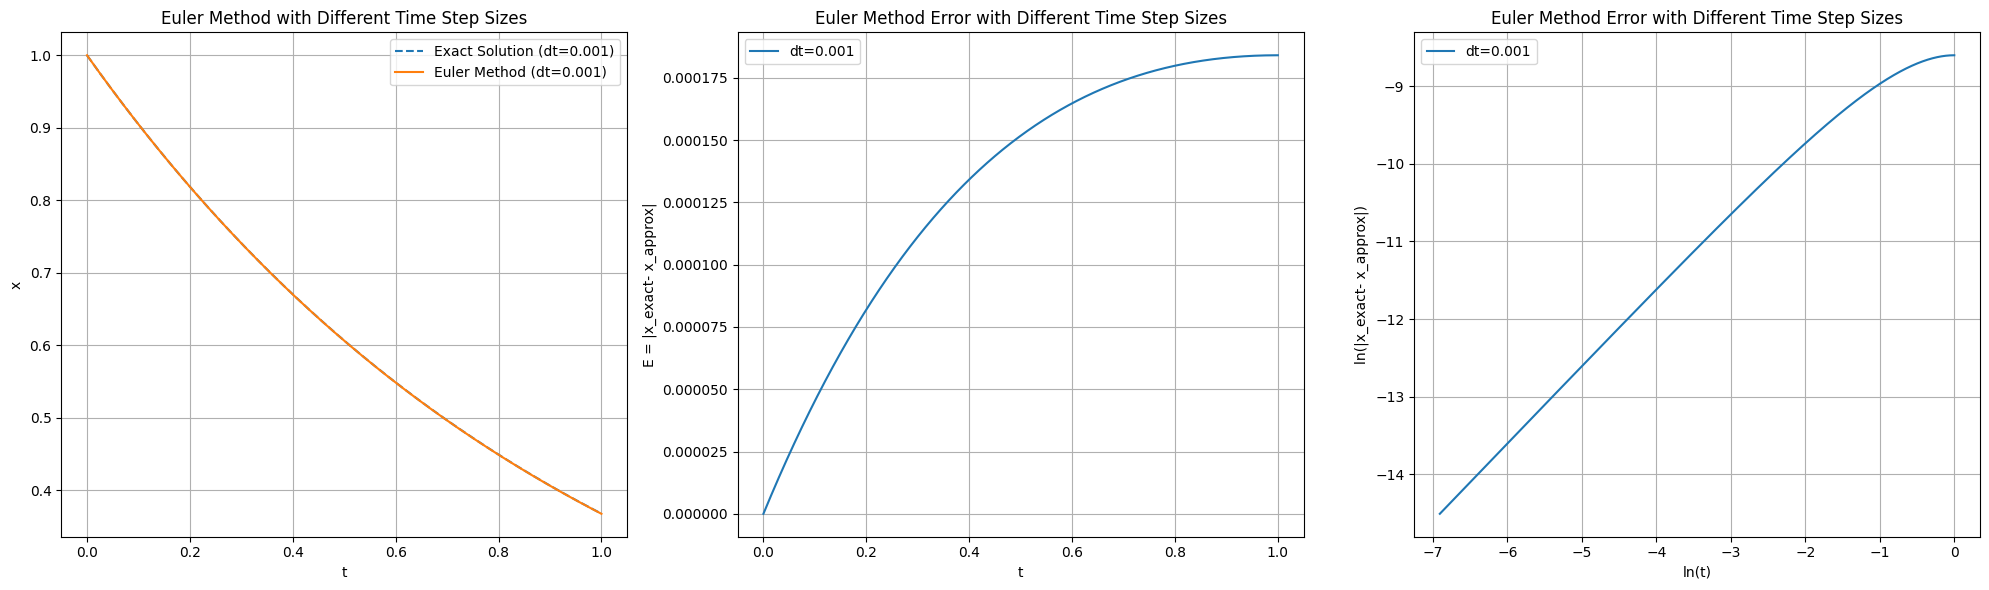

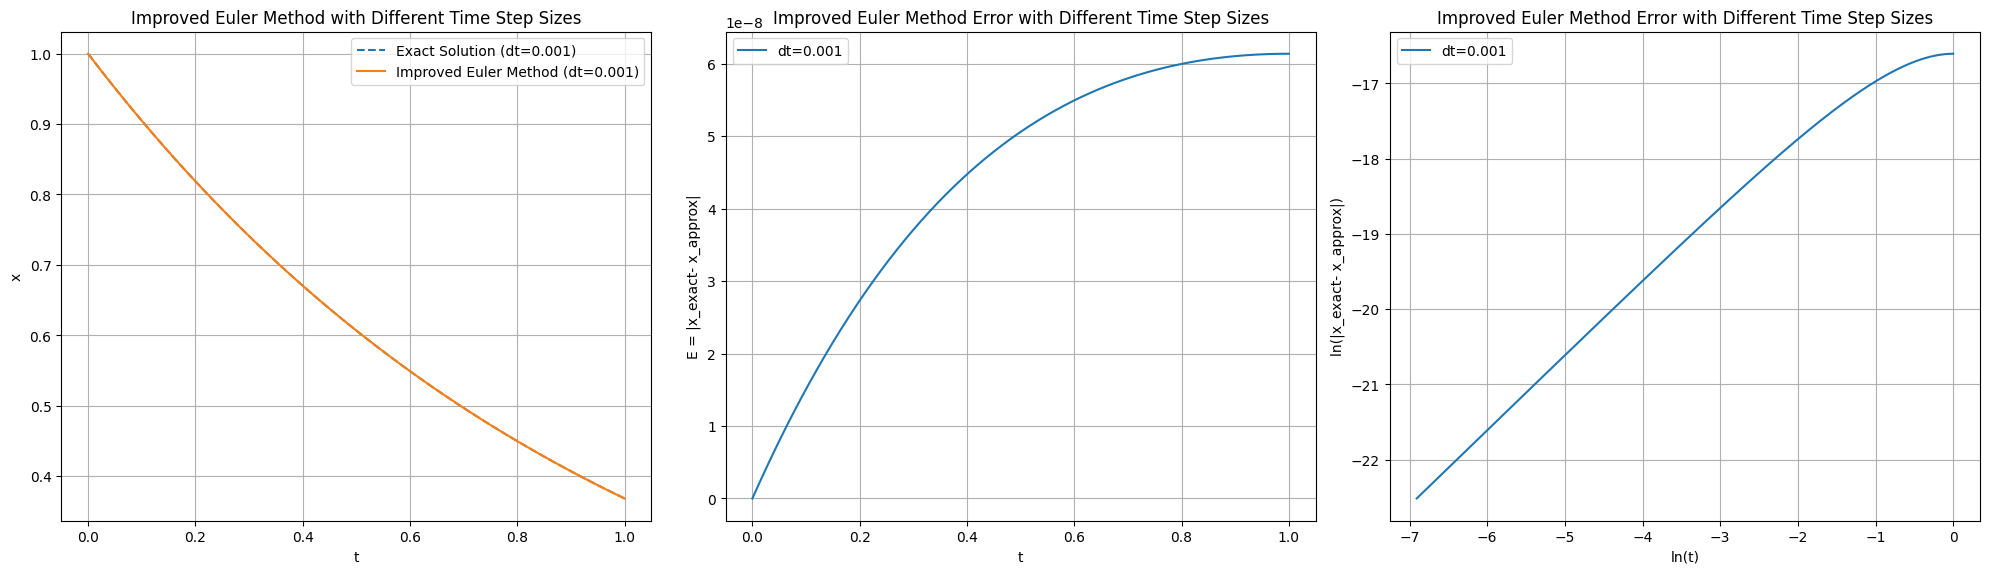

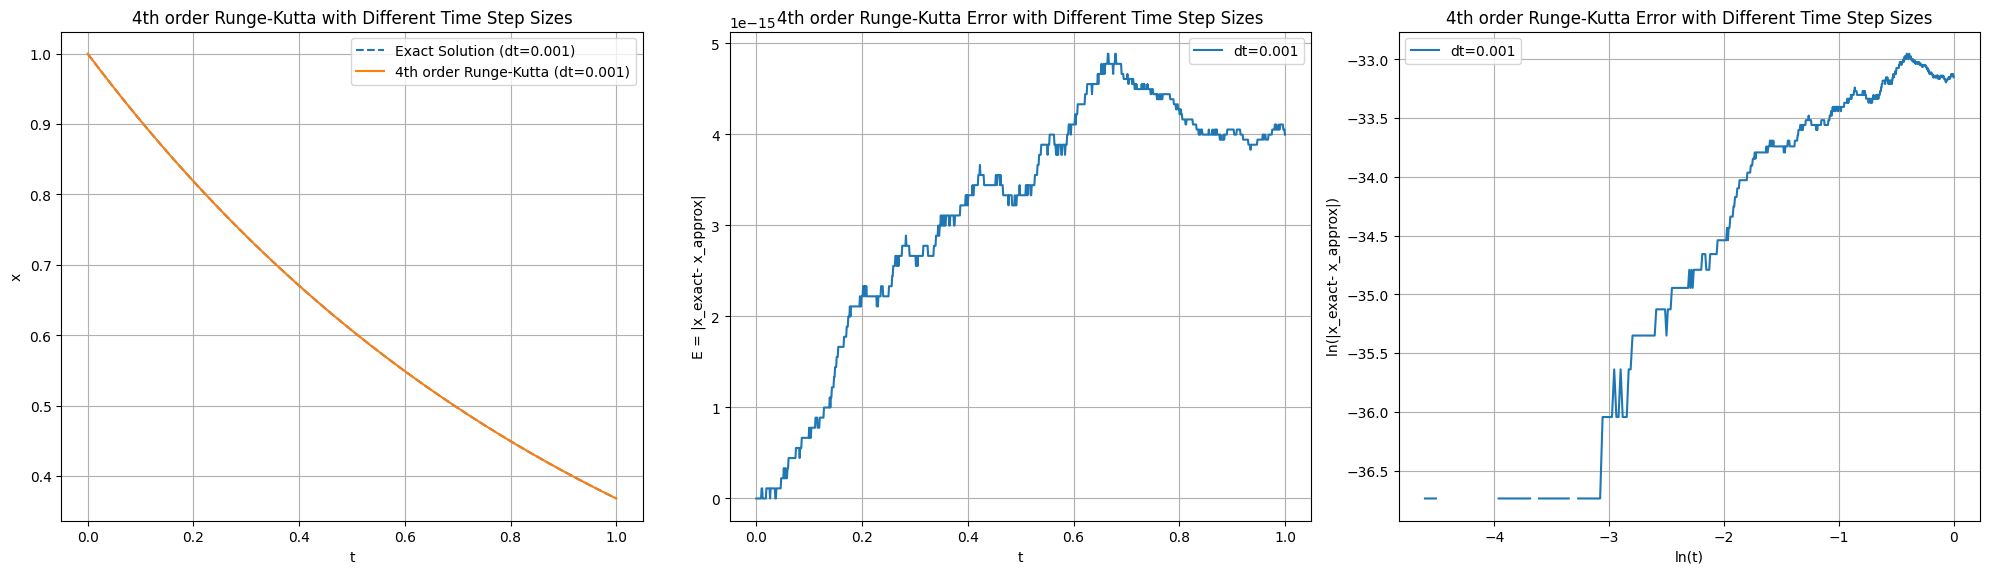

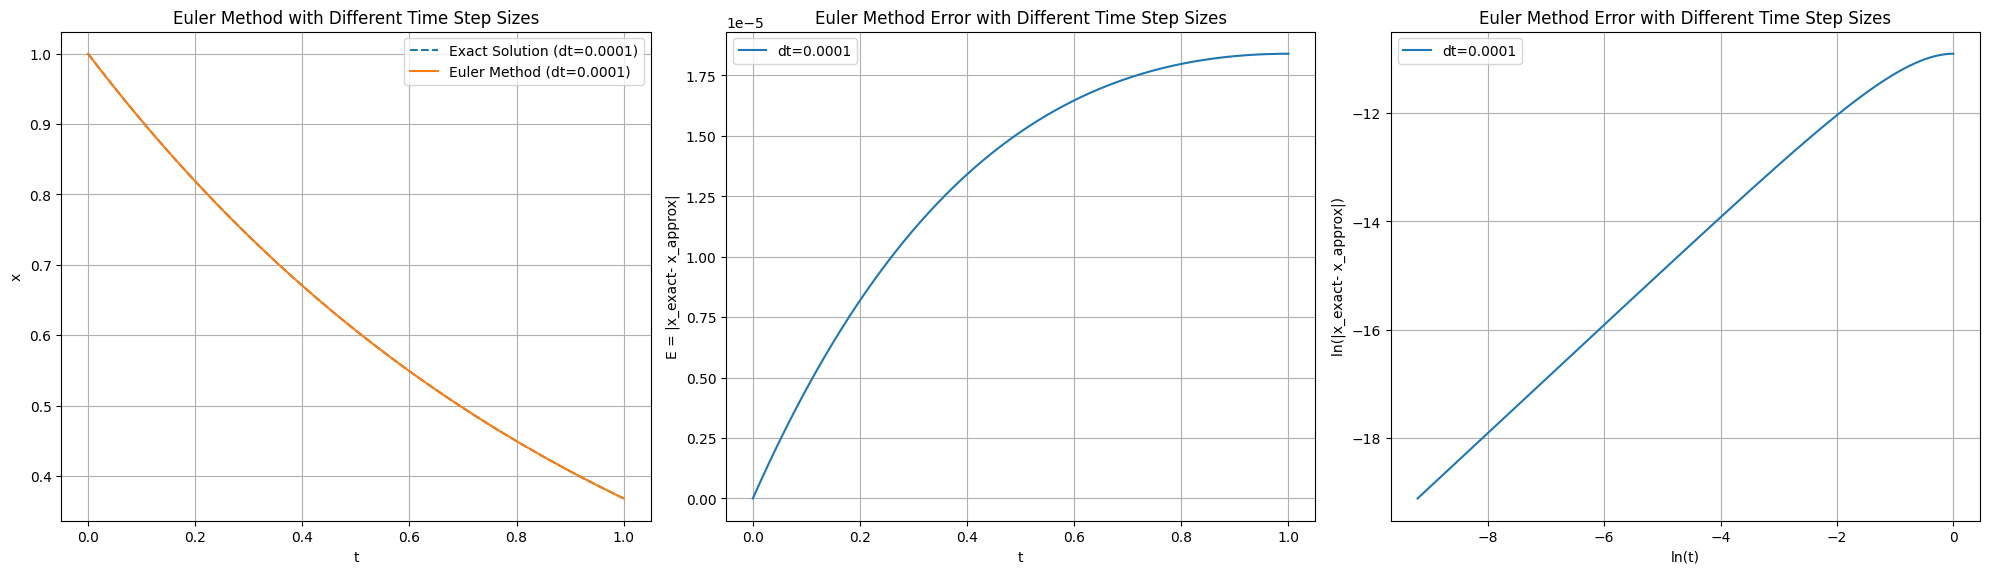

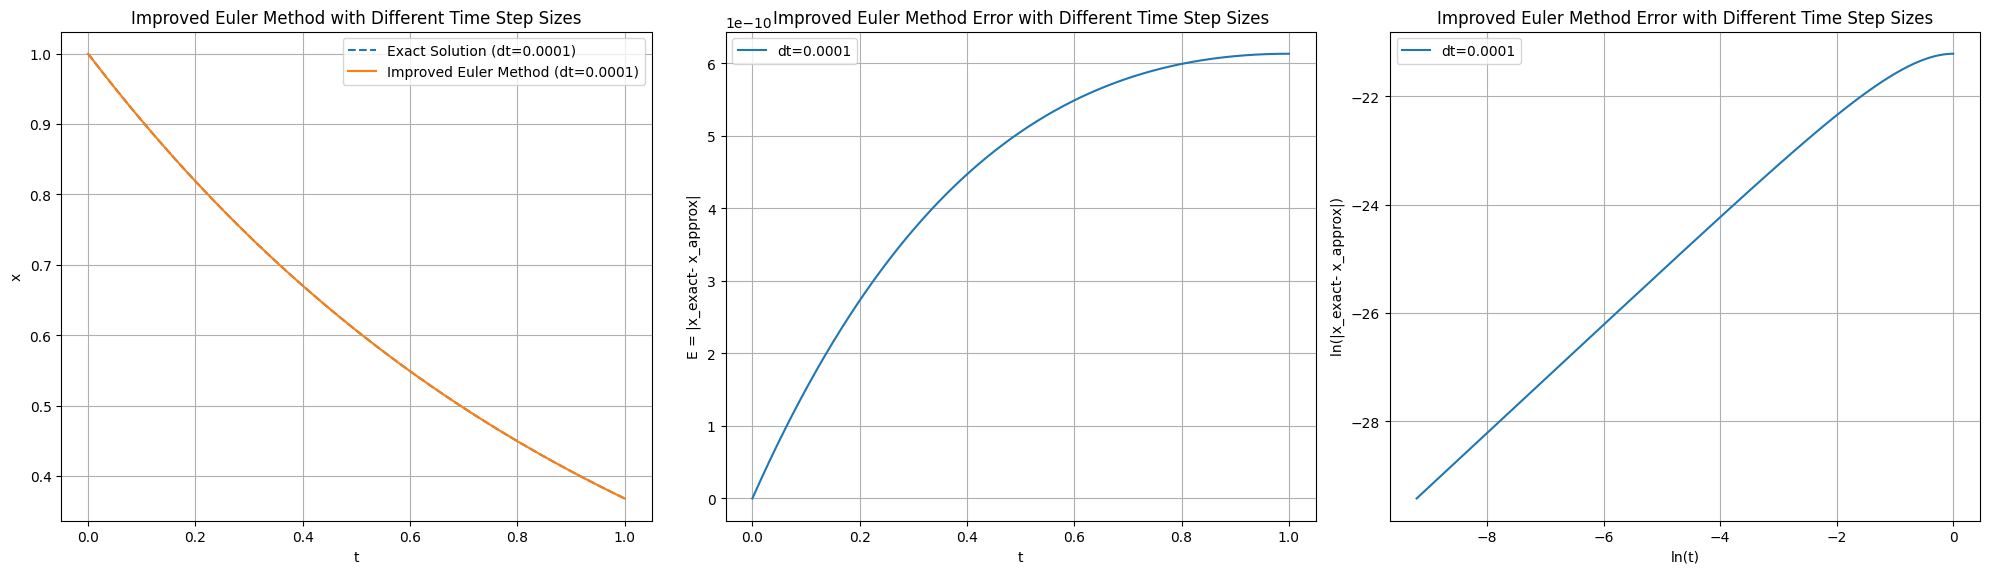

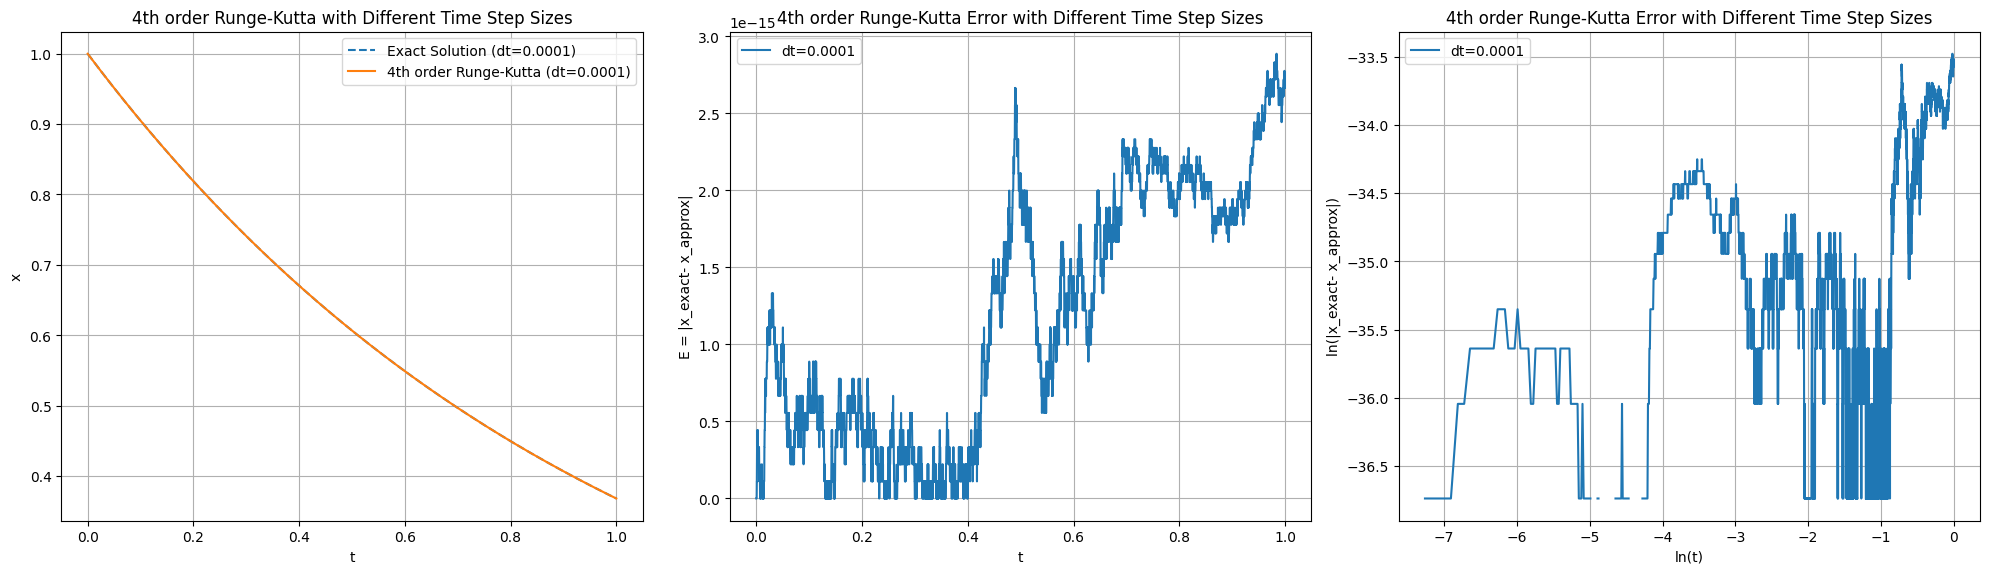

In [139]:
# Plot the results for each time step size
for dt in dts:
    t, x_approx = euler_method(f, x0, t0, t_end, dt)
    x_exact = exact_solution(t) 
    plot_results(t, x_exact,x_approx, dt,'Euler Method')
     
    num_steps = int(1 / dt)
    t__imp, x_imp = solve_improved_euler(1, dt, num_steps)
    t_exact = np.linspace(0, 1, num_steps + 1)
    plot_results(t, x_exact,x_imp, dt,'Improved Euler Method')
    
    t_rk, x_rk = solve_runge_kutta(1, dt, num_steps)
    plot_results(t, x_exact,x_rk, dt,'4th order Runge-Kutta')


C:\Users\35196\AppData\Local\Temp\ipykernel_21100\2019131296.py:29: RuntimeWarning: divide by zero encountered in log
  log_error = np.log(error)
C:\Users\35196\AppData\Local\Temp\ipykernel_21100\2019131296.py:32: RuntimeWarning: divide by zero encountered in log
  axs[2].scatter(np.log(t), np.log(error), label=f'dt={dt}', s=10)
C:\Users\35196\AppData\Local\Temp\ipykernel_21100\2019131296.py:33: RuntimeWarning: divide by zero encountered in log
  axs[2].plot(np.log(t), np.log(error), label=f'dt={dt}')


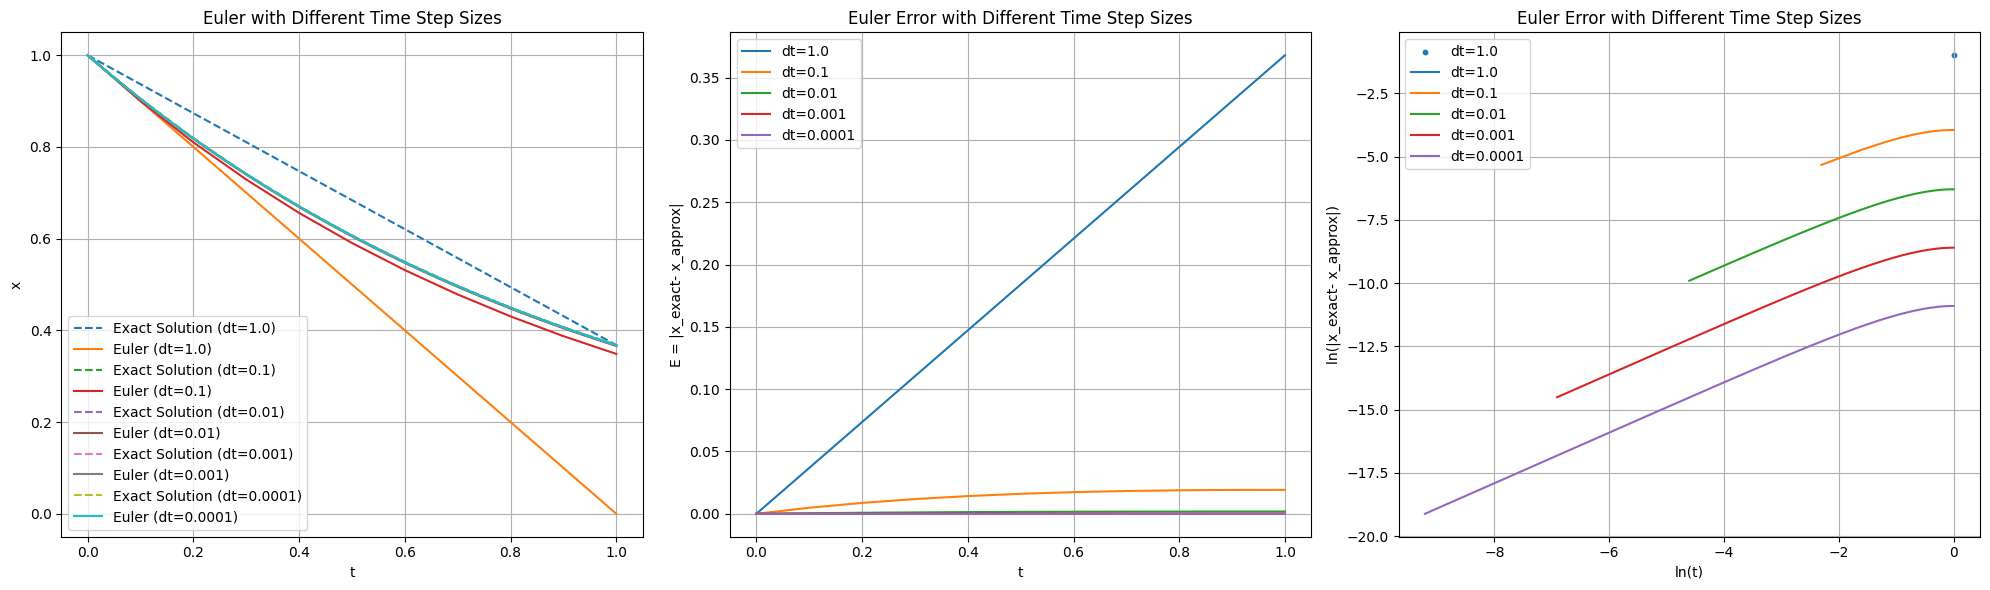

In [140]:

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
# Plot data on the first subplot (axs[0])
for dt in dts:
        
        t, x_approx = euler_method(f, x0, t0, t_end, dt)
        x_exact = exact_solution(t) 
        num_steps = int(1 / dt)
        t__imp, x_imp = solve_improved_euler(1, dt, num_steps)
        t_exact = np.linspace(0, 1, num_steps + 1)
        t_rk, x_rk = solve_runge_kutta(1, dt, num_steps)
        
        axs[0].plot(t, x_exact, label=f'Exact Solution (dt={dt})', linestyle='--')
        axs[0].plot(t, x_approx, label= f'Euler (dt={dt})')
        axs[0].set_xlabel('t')
        axs[0].set_ylabel('x')
        axs[0].set_title('{} with Different Time Step Sizes'.format('Euler'))
        axs[0].legend()
        axs[0].grid(True)
        
        error = np.abs(x_exact- x_approx)
        # Plot data on the second subplot (axs[1])
        axs[1].plot(t, error, label=f'dt={dt}')
        axs[1].set_xlabel('t')
        axs[1].set_ylabel('E = |x_exact- x_approx|')
        axs[1].set_title('{} Error with Different Time Step Sizes'.format('Euler'))
        axs[1].legend()
        axs[1].grid(True)
        
        log_error = np.log(error)
        log_error[error == 0] = np.log(1e-30)
        if dt==1:
            axs[2].scatter(np.log(t), np.log(error), label=f'dt={dt}', s=10)  
        axs[2].plot(np.log(t), np.log(error), label=f'dt={dt}')   
        axs[2].set_xlabel('ln(t)')
        axs[2].set_ylabel('ln(|x_exact- x_approx|)')
        axs[2].set_title('{} Error with Different Time Step Sizes'.format('Euler'))
        axs[2].legend()
        axs[2].grid(True)
    # Adjust layout to prevent overlap
plt.tight_layout()
    
plt.show()

C:\Users\35196\AppData\Local\Temp\ipykernel_21100\3821134196.py:17: RuntimeWarning: divide by zero encountered in log
  log_error = np.log(error)
C:\Users\35196\AppData\Local\Temp\ipykernel_21100\3821134196.py:39: RuntimeWarning: divide by zero encountered in log
  axs[2, i].plot(np.log(t), np.log(error), label=f'dt={dt}')


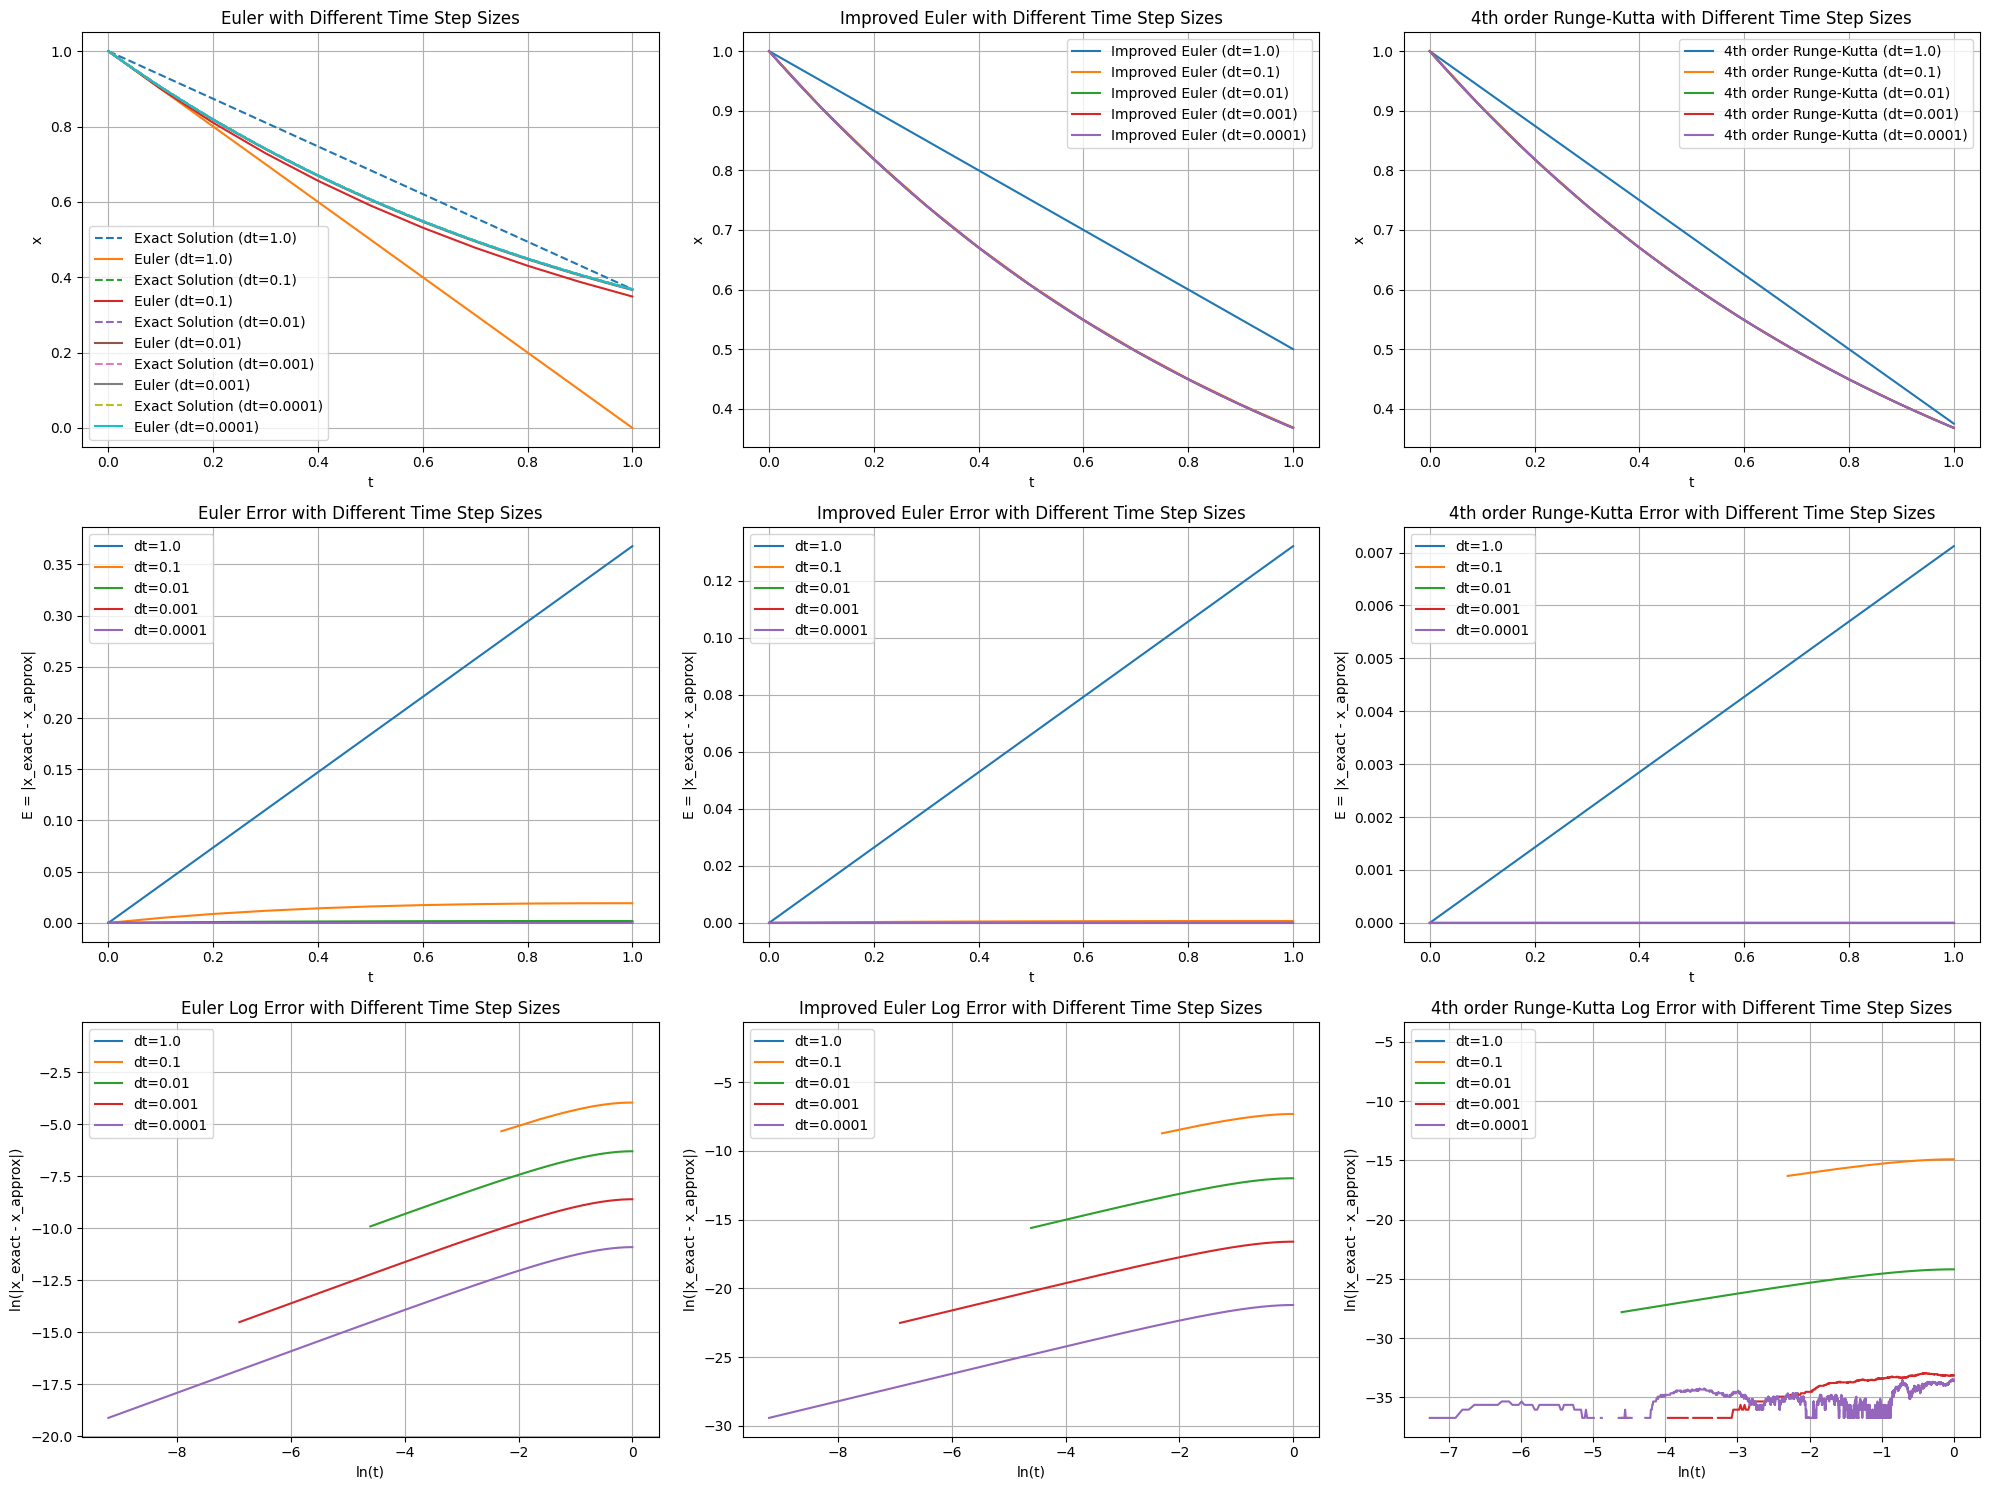

In [141]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

for i, method in enumerate(['Euler', 'Improved Euler', '4th order Runge-Kutta']):
    for j, dt in enumerate(dts):
        num_steps = int((t_end - t0) / dt)
        if method == 'Euler':
            _, x_approx = euler_method(f, x0, t0, t_end, dt)
        elif method == 'Improved Euler':
            _, x_approx = solve_improved_euler(x0, dt, num_steps)
        elif method == '4th order Runge-Kutta':
            _, x_approx = solve_runge_kutta(x0, dt, num_steps)
        
        t = np.linspace(t0, t_end, len(x_approx))
        x_exact = exact_solution(t)
        
        error = np.abs(x_exact - x_approx)
        log_error = np.log(error)
        log_error[error == 0] = np.log(1e-30)
        
        # Plot function
        if i ==0:
            axs[0, i].plot(t, x_exact, label=f'Exact Solution (dt={dt})', linestyle='--')
        axs[0, i].plot(t, x_approx, label=f'{method} (dt={dt})')
        axs[0, i].set_xlabel('t')
        axs[0, i].set_ylabel('x')
        axs[0, i].set_title(f'{method} with Different Time Step Sizes')
        axs[0, i].legend()
        axs[0, i].grid(True)
        
        # Plot error
        axs[1, i].plot(t, error, label=f'dt={dt}')
        axs[1, i].set_xlabel('t')
        axs[1, i].set_ylabel('E = |x_exact - x_approx|')
        axs[1, i].set_title(f'{method} Error with Different Time Step Sizes')
        axs[1, i].legend()
        axs[1, i].grid(True)
        
        # Plot log error
        axs[2, i].plot(np.log(t), np.log(error), label=f'dt={dt}')
        axs[2, i].set_xlabel('ln(t)')
        axs[2, i].set_ylabel('ln(|x_exact - x_approx|)')
        axs[2, i].set_title(f'{method} Log Error with Different Time Step Sizes')
        axs[2, i].legend()
        axs[2, i].grid(True)

plt.tight_layout()
plt.show()
